<a href="https://colab.research.google.com/github/sk-0226/assignmt_2/blob/main/zID_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
PROJECT 2: HDAT9500 T2 2025

---





**zID:** z5514968

**Name: Seong-hee Kwon**

**Date Created:** 2025-08-05  
**Last Modified:** 2025-08-11  
**Tools & Libraries:** NumPy, Pandas, Matplotlib, Scikit-learn, TensorFlow/Keras  
**Dataset Source:** UCI Machine Learning Repository - Breast Cancer Wisconsin Diagnostic Data  
**License:** MIT (or specify if academic project)  
**Notebook Version:** 1.0  
**Environment:**  
  - Python 3.10.12  
  - TensorFlow 2.14.0  
  - scikit-learn 1.3.0  
  - Google Colab AI-first version (June 2025)      

**Description:**

The script implements a workflow for breast cancer classification using a Feedforward Neural Network (FNN) (or Multilayer Perceptron (MLP)). It includes:
- Loading and stratified splitting into training (90%), validation (10% of training), and test (10%) sets.
- Scaling features using StandardScaler for consistent normalization across training, validation, and test sets.
- Building a baseline MLP model with four hidden layers (20 nodes each, SELU activation) and evaluating its performance.
- Performing hyperparameter tuning with Keras Tuner's Random Search
- Evaluating the tuned model with accuracy, classification reports, and a confusion matrix visualization.
- Retraining the best model on combined training and validation data for enhanced performance.
- Saving the final model for future use.

**Output:**
- Trained model file (z5514968_final_model_for_project2.keras)
- Hyperparameter tuning logs (saved in my_cancer_project/my_rnd_search/)
- Confusion matrices for baseline and tuned models (Matplotlib plots)
- Evaluation reports (classification reports and accuracy scores for baseline and tuned models)
- Training logs (loss and accuracy per epoch for training and validation)
- Dataset summary statistics (sizes, shapes, class distributions)

**Use of shortened references:**  
There are two textbooks I will refer to in this document. For convenience, I will use the following short forms:
- Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido, cited as **Müller & Guido (2016)**.
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd Edition) by Aurélien Géron, cited as **Géron, HOML 3rd Ed.**
#####################################################################################

# Introduction
**Background and Motivation**

Breast cancer is a major health issue, and catching it early can make a huge difference. By analyzing features such as the size, texture, and shape of tumor cell nuclei, it is possible to determine whether a tumor is benign or malignant. Machine learning, especially neural networks, is great for identifying patterns in this kind of complex data. This script applies an artificial neural network (ANN) to classify breast cancer cases and assesses its performance to ensure reliable and accurate predictions.

**Project Aims**

This project aims to implement a Feedforward Neural Network (FNN), or Multilayer Perceptron (MLP), as a proof of concept to evaluate its effectiveness in classifying breast cancer cases. This initial approach serves as a starting point toward building a more advanced and reliable model in real-world clinical settings.

**Methodology**

This project follows the machine learning workflow from the HDAT9500 - Machine Learning 1 course, with the following key steps:
- Data Preparation
  - Load the Breast Cancer Wisconsin Dataset using scikit-learn’s load_breast_cancer().
  - Perform stratified splitting into training, validation, and test sets.
  - Apply feature scaling with StandardScaler on training data and transform validation and test sets accordingly.
- Model Development
  - Build and train a baseline Feedforward Neural Network (FNN) / Multilayer Perceptron (MLP) using TensorFlow and Keras with SELU activations.
  - Use Keras Tuner to perform hyperparameter tuning via Random Search to optimize model architecture and learning rate.
- Evaluation
  - Evaluate model performance on the test set using classification metrics including accuracy, classification report, and confusion matrix.
  - Visualize confusion matrices for both baseline and tuned models.
  - Retrain the best model on combined training and validation data to maximize learning from available data.



# <font color='purple'>**Question 1: Project Preparation**

# 1.1 Health Data Science Question
- Health question:
    - Which cell nuclei features in the Breast Cancer Wisconsin Dataset are most significantly associated with differentiating benign from malignant breast tumors?
- Health Data Science question:
  - Which machine learning algorithm provides the best performance for classifying breast tumors as benign or malignant using cell nuclei measurements from the Breast Cancer Wisconsin Dataset? What are the most influential features for accurate classification?
  - Target Variable: Diagnosis (0 = benign, 1 = malignant)
  - Input Variables: Numerical measurements of cell nuclei characteristics (see the variable table below)
  - Task Type: Binary classification

  *References*: https://www.spiedigitallibrary.org/conference-proceedings-of-spie/1905/1/Nuclear-feature-extraction-for-breast-tumor-diagnosis/10.1117/12.148698.short

# 1.2 Method Evaluation - Success Criteria

The success of this project will be determined by the Feedforward Neural Network's ability to accurately classify breast tumors as benign or malignant using cell nuclei features from the Breast Cancer Wisconsin Dataset. The model's performance will be assessed using the following points:

1. Classification Accuracy

The percentage of correctly classified samples (benign and malignant) out of the total test set. While accuracy provides a general indicator of model performance, it may not fully capture model effectiveness if class imbalance is present.

2. Precision, Recall, and F1-Score

Precision measures the proportion of predicted malignant cases that are truly malignant, reflecting the model's ability to avoid false positives.

Recall (Sensitivity) assesses how well the model detects actual malignant cases, minimizing false negatives — which is critical in a clinical context.

F1-Score balances precision and recall, especially useful in imbalanced classification settings.

3. Overfitting

Monitoring training vs. validation loss and accuracy will help determine if the model generalizes well or suffers from overfitting. A successful model should maintain consistent performance across training, validation, and test datasets.

As this project serves as an initial proof of concept, success will be indicated by achieving:
- Test accuracy of at least 90%.
- F1-score of 0.90 or higher for the malignant class.

These criteria are based on typical performance benchmarks for this dataset and will guide the evaluation of the Feedforward Neural Network's effectiveness in this task.

**Reference:**
- Street, W., Wolberg, W., & Mangasarian, O. (1993).
Nuclear feature extraction for breast tumor diagnosis.
Electronic Imaging.
https://www.semanticscholar.org/paper/Nuclear-feature-extraction-for-breast-tumor-Street-Wolberg/53f0fbb425bc14468eb3bf96b2e1d41ba8087f36

# 1.3 Data

The Wisconsin Breast Cancer Dataset is a widely used dataset in machine learning and medical research. It contains features computed from digitised images of fine needle aspirate (FNA) of breast masses. These features describe characteristics of the cell nuclei present in the images and help differentiate between malignant (cancerous) and benign (non-cancerous) tumours.

This dataset is available in the scikit-learn library under load_breast_cancer().

**Table of Software and Libraries**

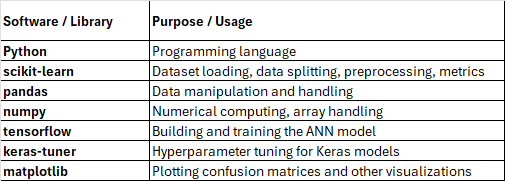

**Table of Variables and Constants**

The dataset consists of 30 numerical features derived from digitised images of breast masses, plus an ID number and a diagnosis label. The diagnosis is a binary classification:

Malignant (M): Tumour is cancerous (represented as 1 in the dataset).
Benign (B): Tumour is non-cancerous (represented as 0 in the dataset).
The features are computed from three groups of measurements:

Mean values of different characteristics of the tumour.
Standard error of these measurements.
Worst (largest) values for each characteristic.

Below is a table describing each variable in the dataset.

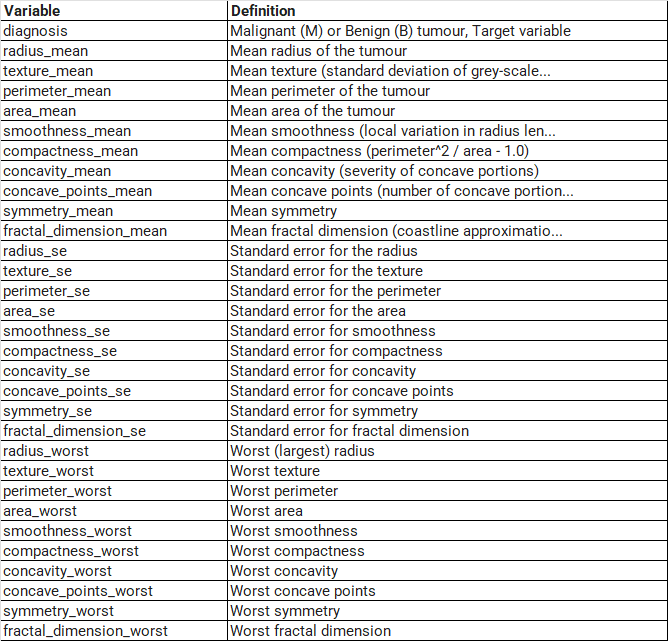

The following table lists the constants for the project.

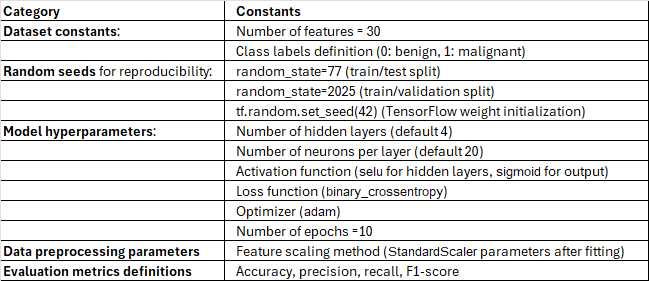

# <font color='purple'>**Question 2: Data**

# 2.1 Data
Upload the breast_cancer dataset directly from scikit-learn


In [1]:
pip install scikit-learn

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
cancer = load_breast_cancer()

# Assign the feature data to X for machine learning input
# Assign the target labels to y which the model aims to predict.
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target")   # Store as a Series for a single target variable

# To inspect dataset structure and contents
feature_names = cancer.feature_names  # Store feature names for reference or analysis
target_names = cancer.target_names
print("Data shape:", cancer.data.shape)
print("Target shape:", cancer.target.shape)
print("Feature names:", feature_names)
print("Target names:", target_names)

Data shape: (569, 30)
Target shape: (569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


# 2.2 Split the Data
- Split data
- Scaling data

In [3]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,    # 10% test, 90% train
                                                    random_state=77,        # random seed for reproducibility
                                                    stratify=y)             # To maintain the same class distribution

In [4]:
# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,   # 10% of the current input (X_train, y_train) for validation
                                                  random_state=2025,
                                                  stratify=y_train)
# 10% of the 90% (i.e., 0.1 × 0.9 = 0.09 or 9% of the original dataset) goes to valisation set.

In [5]:
# To see the sample sizes of each dataset
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

# To see the shape of X datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# To see the shape of y datasets
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


Training set size: 460
Validation set size: 52
Test set size: 57
X_train shape: (460, 30)
X_val shape: (52, 30)
X_test shape: (57, 30)
y_train shape: (460,)
y_val shape: (52,)
y_test shape: (57,)


The training input features (X_train) have 460 samples. The validation input features have 52 samples. The test input features have 57 samples.

The training labels/targets (y_train) is a 1D array with 460 values. The validation labels are a 1D array with 52 values. The test labels are a 1D array with 57 values.

In [6]:
### Reference: Laboratory_07_CV_Intro_ANN_Solution.ipynb
### AI assistance: prompt - 'How to calculate class distribution percentages from pandas series' (ChatGPT)

# To check class balance in each set
print("Training set class distribution:")
print(y_train.value_counts(normalize=True) * 100)  # normalize=True: returns relative frequencies (fractions)
print("Validation set class distribution:")
print(y_val.value_counts(normalize=True) * 100)
print("Test set class distribution:")
print(y_test.value_counts(normalize=True) * 100)

Training set class distribution:
target
1    62.608696
0    37.391304
Name: proportion, dtype: float64
Validation set class distribution:
target
1    63.461538
0    36.538462
Name: proportion, dtype: float64
Test set class distribution:
target
1    63.157895
0    36.842105
Name: proportion, dtype: float64


< Summary on class distribution >

About 62.61% of training samples are class 1, 37.39% are class 0. Validation set has a similar class balance. Test set also matches this distribution.

The class distribution stayed pretty similar across the training, validation, and test sets because we used stratified splitting. This means the model gets to see a good mix of both classes during training and testing, which helps avoid any bias that might happen if one class was overrepresented.

Although the class distributions are consistent across the training, validation, and test sets, they are still somewhat imbalanced overall.
 it can still affect model performance, especially on the minority class (class 0 = benign).

Since this is cancer detection, ensuring high sensitivity is essential. Monitoring precision, recall, and F1-score during evaluation helps assess performance on each class.


**Scale the features**

I am going to trandform the feature inputs to have zero mean and unit variance using StandardScaler(). This is important because:
1. The project requires using the SELU activation function, which performs best when inputs are standardized. Standardizing ensures compatibility by centering the data and normalizing its variance. (**Reference**: AI Assistance prompt on SELU function.)
2. Neural networks expect input features to vary similarly, ideally with mean 0 and variance 1. Rescaling the data improves model performance and stability. (**Reference**: Müller & Guido (2016), Chapter 3.3 Preprocessing and Scaling.)

Because the dataset is numerical, scaling is crucial. Without it, gradients may vanish or explode, causing inefficient or unstable learning.

Because neural networks are sensitive to the scale of input features preprocessing significantly impacts feedforward neural networks by:
- Training Speed - Normalized data leads to faster convergence during backpropagation.
- Accuracy - Clean, well-scaled data helps the model learn meaningful patterns.
- Reducing overfitting by removing noise.
- Increasing model stability across runs.
- Interpretability - Standardized inputs can make it easier to interpret learned weights.

Scaling and preprocessing ensure the network performs optimally. Without them, even a well-designed neural network may underperform or fail to generalize.

In [7]:
### Reference: (Müller & Guido (2016) Chapter 3.3.3 Scaling Tarining and Test Data the same way)

# StandardScaler() is used to scale data and also to make compatible with SELU activation function later.
# fit_transform is used dur to its efficient computation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # calling fit and transform
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

For validation and test sets, scaler.transform() is used to apply the same scaling (based on the training set's statistics) to avoid data leakage and ensure consistent preprocessing.

# <font color='purple'>**Question 3: Training and Tuning**

# Model

 Since the task type is binary classification task, I am going to follow the typical architecture of a classification MLP **(Géron, HOML 3rd Ed.)**
- Hiddenlayer: 4 layers, each containing 20 nodes
- Output neuron: 1
- Hidden layers activation: SELU (Scaled Exponential Linear Unit)
  - SELU is a self-normalizing activation function that automatically pushes activations toward zero mean and unit variance. Its goal is to preserve this normalization from input to output. This works well together with using a StandardScaler in preprocessing earlier.
- Output layer activation: Sigmoid
- Loss function: X-entrophy

(**Reference**:Géron, HOML 3rd Ed. chapter 10 Creating the model using the sequential API)


**Build Baseline model** -- **Fully connected (Dense layer) Artificial Neural Networks (ANNs)**

In [8]:
# Build baseline model (4 layers, 20 nodes, SELU)
import tensorflow as tf

tf.random.set_seed(42)     # For reproducibility: the initial weights and biases in each Dense layers are the same every time I run the code
baseline_model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(30,)),             # AI assistance: shape of the input = 30 features
  tf.keras.layers.Dense(20, activation="selu"),
  tf.keras.layers.Dense(20, activation="selu"),
  tf.keras.layers.Dense(20, activation="selu"),
  tf.keras.layers.Dense(20, activation="selu"),
  tf.keras.layers.Dense(1, activation="sigmoid")  # node=1 as we are dealing with  a binary classification problem
])

Set TensorFlow’s random seed to ensure reproducible results: the randomly initialized weights in the hidden and output layers will remain the same each time the notebook is run.

**Reference**:
- (Géron, HOML 3rd Ed. chapter 10 - Creating the model using the sequential API)
- (OpenAI, 2025, https://chat.openai.com/): prompt — shape() value in Input(shape=())


In [9]:
# To display the architecture of a neural network
# - each layer’s type, output shape, and number of trainable parameters.
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,901 (7.43 KB)

 Trainable params: 1,901 (7.43 KB)

 Non-trainable params: 0 (0.00 B)

The summary table shows that a fully connected feedforward neural network with 4 hidden layers and 1 output layer.

Parameters in each layer:
- First hiden layer: 30 features input * 20 connection weights +20 (bias terms) = 620
- other each hidden layer: 20*20+20 = 420
- output layer: 20*1 +1 = 21

In total,
- Trainable params = 1,881. These are the values the model will learn during training through backpropagation.
- Non-trainable params = 0


**Compile step with baseline model**  
Now a model has been created. The next step is to call compile() method to specify the loss function and the optimiser to use.

In [10]:
baseline_model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Since this is a binary classification task, the output layer should use the "sigmoid" activation function, and the appropriate loss function is "binary_crossentropy".

**Reference**: (Géron, HOML 3rd Ed. chapter 10 - Compiling the model)

The optimizer "adam"(adaptive moment estimation) is an adaptive learning rate algorithm. It adjusts the learning rate automatically for each weight in the model and therefore it requires less tuning of the learning rate hyperparameter. It works in more stable and adaptive way than plain SGD (stochastic gradient descent).

**Reference**:
- (Géron, HOML 3rd Ed. chapter 10 - Compiling the model)
- (Géron, HOML 3rd Ed. chapter 11 - Adam)
- (OpenAI, 2025, https://chat.openai.com/): prompt — Compare sgd and adam

**Train baseline model**

In [11]:
# Train baseline model
# Used validation data to monitor performance during training
baseline_model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6586 - loss: 0.5843 - val_accuracy: 0.9615 - val_loss: 0.1941
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9451 - loss: 0.1986 - val_accuracy: 0.9808 - val_loss: 0.1069
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9647 - loss: 0.1233 - val_accuracy: 1.0000 - val_loss: 0.0682
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9810 - loss: 0.0940 - val_accuracy: 1.0000 - val_loss: 0.0477
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9854 - loss: 0.0785 - val_accuracy: 1.0000 - val_loss: 0.0368
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9923 - loss: 0.0689 - val_accuracy: 1.0000 - val_loss: 0.0303
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9923 - loss: 0.0625 - val_accuracy: 1.0000 - val_loss: 0.0257
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9923 - loss: 0.0577 - val_accuracy: 1.0000 - val

The model started with a training accuracy of 65.86% in the first epoch, then jumped quickly to 94.51% by the second epoch and passed 99% from the sixth epoch onwards. Validation accuracy was already high at 96.15% in the first epoch, reached 98.08% in the second, and hit a perfect 100% by the third epoch, staying there for the rest of training.

Training loss dropped steadily from 0.5843 to 0.0514, and validation loss also fell from 0.1941 to 0.0195. This means the model not only made more correct predictions but also became more confident in its answers as training went on.

In short, the model learned the task very quickly, reaching perfect validation accuracy in just a few epochs. Since accuracy remained high on both sets and validation loss improved over time, there is no clear sign of harmful overfitting. In overfitting, the model usually gets better on training data but worse on validation data. That didn't happen here. However, unusually high, stable validation performance can mean the validation set is too similar to the training set.

**Baseline evaluation**

In [12]:
# Evaluate baseline model
baseline_test_loss, baseline_test_accuracy = baseline_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Baseline Model Test Accuracy: {baseline_test_accuracy:.4f}")

Baseline Model Test Accuracy: 0.9825


The baseline model scored a test accuracy of 98.25%, showing strong performance on new data. This suggests the initial model setup is effective at separating the classes in this dataset.

In [13]:
from sklearn.metrics import classification_report

# Baseline model classification report
y_pred_baseline = (baseline_model.predict(X_test_scaled) > 0.5).astype(int)
print("Baseline Model Classification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=cancer.target_names))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Baseline Model Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      1.00      0.98        21
      benign       1.00      0.97      0.99        36

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



The classification report results are consistent with the accuaracy in the above.

For the malignant class, 95% of the samples predicted as malignant were actually malignant (precision 0.95). Also, the modelcorrectly identified all malignant cases (recall 1.00). The f1 score 0.98 shows good balance between precision and recall.

Similarly, fro the benign class, every predicted benign case was truly benign (precision 1.00) and 97% of all benign cases were correctly identified (recall 0.97). The f1 score is 0.99.

The model performs very well at at detecting malignant cases with no false negatives, which is crucial in cancer detection.

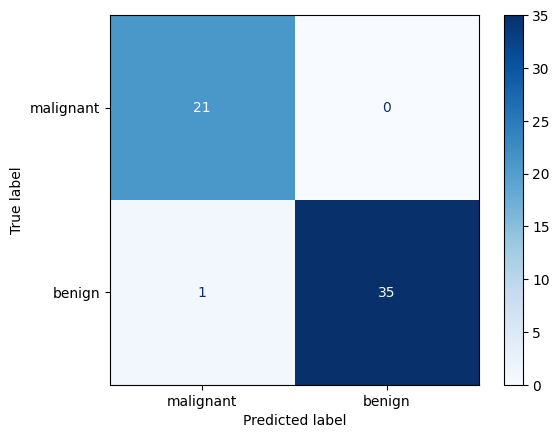

In [14]:
# Baseline model confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_baseline = confusion_matrix(y_test, y_pred_baseline)
disp_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=cancer.target_names)

disp_baseline.plot(cmap=plt.cm.Blues)

# Reference - Gemini AI assistance: automatic suggestion

The model correctly classified 21 malignant cases and 35 benign cases. There was one benign case incorrectly predicted as malignant (low false positive), while no malignant cases were missed strong sensitivity or high precision). The model performs well in distinguishing between the two classes.

#####################################################################################################

The baseline model already meets the success criteria and shows strong performance. Nevertheless, because the assignment includes a tuning step and it could offer valuable insights, I will proceed with model tuning to explore possible improvements and ensure the model is as robust as possible. This will also help provide a better understanding of how different hyperparameters impact the results.

# Hyperparameter tuning and Specifications

My initial model has a fixed architecture—with 4 hidden layers, each containing 20 neurons and using the selu activation. Having built and compiled this model, I am now moving on to tuning its hyperparameters.

Because there are many hyperparameters in a neural network, I am using the Keras Tuner library to make tuning easier and faster. It helps me quickly find the best setup for things like layers, neurons, learning rate, etc.

The following function builds and compiles a Feedforward Neural Network (FNN) for the cancer classification task, tuning hyperparameters like the number of hidden layers (n_hidden), neurons per layer (n_neurons), learning rate (learning_rate), and optimizer type (optimizer). I have adapted the example code from Chapter 10 on hyperparameter tuning to suit a binary classification task.

Adjustment made:
- Removing the Flatten() layer since the input is already flat
- Having 2 activation function choices for hidden layers
- Using an output layer with 1 neuron and sigmoid activation
- Output layer and loss function match binary classification task

**Reference**:
- Reference: (Géron, HOML 3rd Ed. chapter 10 Fine-Tuning Neural Network Hyperparameters)
- (OpenAI, 2025, https://chat.openai.com/): prompt - how to specify just adam, instead of optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
- TensorFlow Keras Adam optimizer documentation: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [15]:
# Inatall  Keras Tuner
%pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


**Define model-building function for tuning**

In [16]:
# Imporet hyperparameter tuning library for Keras models.
import keras_tuner as kt

# Define model-building function for tuning
# This function build and return a compiled Keras model.
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=2, max_value=6, default=4)       # Tune around baseline 4
    n_neurons = hp.Int("n_neurons", min_value=10, max_value=30, default=20)  # Tune around baseline 20
    optimizer = tf.keras.optimizers.Adam(learning_rate = hp.Float("learning_rate", min_value=2e-4, max_value=1e-1,
                             sampling="log"))

    model = tf.keras.Sequential()
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="selu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))    # For binary classification, one neuron with a sigmoid in the output layer.

    model.compile(loss="binary_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

# Reference: (Géron, HOML 3rd Ed. chapter 10 Fine-Tuning Neural Network Hyperparameters)

n_hidden: I set the maximum number of hidden layers to 8, which is double the 4 layers used in the initial model, to allow the tuner to explore deeper architectures.

n_neurons: The number of neurons per layer is set to range from 17 to 250, starting slightly below the initial model’s 20 neurons to allow for smaller layers, and extending up to 250 for broad exploration.

activation: Even though my initial model used selu, I added another activation function, relu, as a choice for hyperparameter tuning. I chose both selu and relu so the tuner can try each and find out which one works better.



**Perform hyperparameter tuning using the Random Search**

In order to do a basic random search, I am creating a kt.RandomSearch tuner, passing the build_model function to the constructor, and call the tuner's search() method:

In [17]:
# Perform hyperparameter tuning using the Random Search
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=8, overwrite=True, # Try 8 different hyperparameter combinations.
    directory="my_cancer_project", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train_scaled, y_train, epochs=10,       # Each trial (hyperparameter set) train for 10 epochs.
                           validation_data=(X_val_scaled, y_val))

# "my_cancer_project": Folder to save tuning logs and trial models.
# "my_rnd_search": Subfolder name for this specific tuning run.

Trial 8 Complete [00h 00m 03s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 31s


After completing 8 hyperparameter tuning trials, the highest validation accuracy achieved was 100% (1.0). This indicates that at least one hyperparameter configuration allowed the model to perfectly classify the validation data.
These results highlight the model's strong performance on the validation set.

**Get the best model**

In [18]:
# Get the best model
best_model = random_search_tuner.get_best_models(num_models=1)[0]
# To view the architecture and parameters of the selected model.
best_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 761 (2.97 KB)

 Trainable params: 761 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

This table shows the structure of the neural network, including each layer's output shape and the number of parameters it contains.

Parameters in each layer:
- First hiden layer: 30 features input * 10 connection weights +10 (bias terms) = 310
- other each hidden layer: 10*10+10 = 110
- output layer: 10*1 +1 = 11

In total,
- Trainable params = 761. These are the values the model will learn during training through backpropagation.
- Non-trainable params = 0

In total, the network has 761 trainable parameters, and no non-trainable parameters. This makes it a relatively small feedforward neural network with one input layer, five hidden layers, and one output layer. It is simple enough for quick training on small datasets, while still providing multiple layers for learning patterns.

In [19]:
#  To get the hyperParameters of the best model
best_params = random_search_tuner.get_best_hyperparameters(num_trials=1)[0].values
print("Best hyperparameters:", best_params)

Best hyperparameters: {'n_hidden': 5, 'n_neurons': 10, 'learning_rate': 0.0025331218408821813}


The tuner found that a network with 5 hidden layers, each with 10 neurons. The learning rate about about 0.0025 works best for maximizing validation accuracy.

# <font color='purple'>**Question 4: Evaluate the model**

**Evaluate the tunned best_model**

In [20]:
# Evaluate the best_model on the test set to see how well it generalizes
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9441 - loss: 0.1670 
Test accuracy: 0.9474


The model hit 94.74% accuracy on the complete test set, showing it generalizes well to unseen data.

In [21]:
# classification report for tuned model
y_pred_tuned = (best_model.predict(X_test_scaled) > 0.5).astype(int)
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=cancer.target_names))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Tuned Model Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.90      0.93        21
      benign       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



Of the instances predicted as malignant, 95% were actually malignant, indicating a low rate of false positives. The model correctly identified 90% of all actual malignant cases, which means it missed 10% of malignant samples (false negatives). The F1-score of 0.93 shows a strong balance between precision and recall for the malignant class.

For benign cases, 95% of the predicted benign instances were truly benign, also reflecting a low false positive rate. The model successfully detected 97% of all actual benign cases, resulting in very few false negatives. The F1-score of 0.96 indicates excellent overall performance for benign classification.

Overall, the model achieved an accuracy of 95%, with good balance in avoiding both false positive and false negative across the two classes.

**Reference**: Gemini AI assistance: Convert predicted probabilities to binary class labels  
  - (I encountered a "ValueError: Classification metrics can't handle a mix of binary and continuous targets"  when running my code, and Gemini's automatic suggestion helped me identify and fix the issue.)

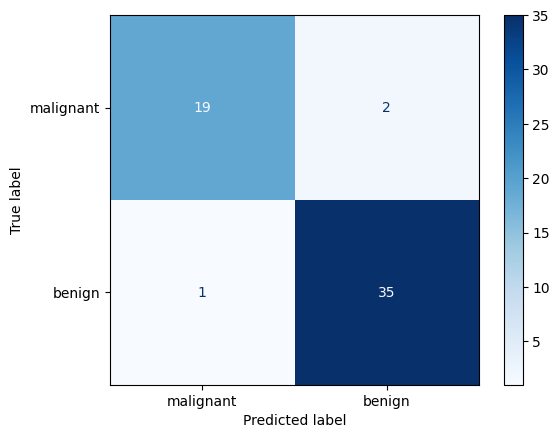

In [22]:
# Confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=cancer.target_names)

disp_tuned.plot(cmap=plt.cm.Blues)

The tuned MLP model performs well, with only 2 misclassifications out of 57. However, 1 false negative case is a critical error in cancer detection, as it could mean missing a case that needs treatment. Also, 1 false positive case can lead to unnecessary follow-up tests or anxiety but is less harmful than a false negative.
The matrix shows balanced errors (1 false negative and 1 false positive), with no strong bias toward one class, despite the slight imbalance in the test set (about 63% benign, as per the script's stratified split).

# Retrain the best_model on the combined train and validation data

After evaluating the results, I chose to retrain the model on both the training and validation data so it can learn from more examples. Since the validation set was already used for tuning, combining it with the training data should help improve performance and make the model more reliable when tested on new data. This is a common machine learning practice to make use of all available labeled data (Géron, 2019). The approach and details were discussed with ChatGPT (OpenAI, 2025).

Reference: (Géron, HOML 3rd Ed. chapter 10 - Fine-Tuning Neural Network Hyperparameters)

In [23]:
# Retrain the best_model on the combined train and validation data
import numpy as np

# Combine scaled training and validation features
X_combined = np.concatenate([X_train_scaled, X_val_scaled], axis=0)

# Combine corresponding labels, ensuring they are numerical numpy arrays
y_combined = np.concatenate([y_train.values.astype(float), y_val.values.astype(float)], axis=0)

# Retrain the best_model on combined data
best_model.fit(X_combined, y_combined, epochs=10)

# Reference:
# (OpenAI, 2025, https://chat.openai.com/): prompt - how to combine train and validation data for final training
# Gemini AI assistance: automatic suggestion with 'axis=0'

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9728 - loss: 0.0883
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.0482 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9893 - loss: 0.0421
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0383 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9935 - loss: 0.0348  
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9938 - loss: 0.0324 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0303 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9938 - loss: 0.0289 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0268 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9938 - loss: 0.0265


The model started off with a good accuracy of about 97% and made some errors, shown by the loss of 0.0883. The starting accuracy of 96.56% is excellent, reflecting that the best_model from RandomSearch was already well-optimized during tuning (using val_accuracy as the objective). This is expected for the breast cancer dataset, which is relatively clean and has well-separated classes (malignant vs. benign).

As it trained over 10 rounds, the accuracy kept improving and got close to 99.4% by the end. At the same time, the loss went down to 0.0265, meaning the model's prediction became more correct. The accuracy did not change much in the last few rounds, showing the model was settling and learning had slowed down. Each round finished quickly, so the training went smoothly and efficiently.

# Save the final model


In [24]:
# Save the entire Keras model into a single file named my_model.h5
best_model.save("z5514968_final_model_for_project2.keras")

I tried model.save("my_keras_model", save_format="tf") as shown in the book, but Colab Gemini suggested removing the save_format argument since it’s no longer required. Now, providing only the file path with either a .keras or .h5 extension is sufficient.

Reference:
- (Géron, HOML 3rd Ed. chapter 10 - Saving and Restoring a Model)
- Gemini AI assistant: automatic suggestion for fixing save_format argument

# <font color='purple'>**Question 5: Model Comparison and Safety Evaluation**

# 5.1 Comparative Test

**5.1.1 Briefly describe the logistic regression model from Project 1.**

In Project 1, I developed and evaluated a logistic regression model to classify breast tumors as benign or malignant based on features extracted from digitized images of fine needle aspirates. The goal was to build a reliable predictive model to aid early cancer diagnosis.

The logistic regression model (log_reg) was trained with regularization (L1 and L2) to reduce overfitting and improve generalization. Hyperparameter tuning was performed using GridSearchCV with 3-fold cross-validation, optimizing for F1-score. The model pipeline included feature standardization and feature selection via SelectKBest. Different class weightings were tested to address class imbalance, as weighting helps the model focus more on minority classes and improve sensitivity.

Model performance was assessed using classification reports (precision, recall, F1-score), confusion matrices, ROC curves with AUC, and logistic regression coefficient analysis for the selected features.

This approach balanced accuracy with the practical needs of cancer diagnosis. It emphasized strong validation and careful handling of class imbalance.

**5.1.2 Compare your ANN to this model: What are the relative strengths and** **limitations of each, especially in a healthcare context?**

In Project 1, the logistic regression model offered a robust, interpretable baseline for healthcare prediction tasks. It was optimized using GridSearchCV for F1-score, incorporated feature selection (SelectKBest), and used regularization (L1/L2) to reduce overfitting. Its simplicity and transparency made it suitable for clinical environments where explainability is paramount. Clinicians could easily interpret the model's coefficients to understand which features contributed to a diagnosis, which is an essential requirement in regulated, high-stakes settings.

However, the logistic regression model also has notable limitations. Its linear nature restricts its ability to capture complex, nonlinear relationships within the data, which can be critical in nuanced healthcare scenarios. As a result, it may underperform on datasets where subtle feature interactions play a significant role in prediction. Additionally, its performance tends to plateau unless supported by extensive feature engineering or transformations, which can add complexity to the modeling pipeline and reduce its appeal as a straightforward clinical tool.

The ANN (MLP) model in Project 2, built with TensorFlow and tuned via Keras Tuner, demonstrated a deeper architecture capable of capturing complex, nonlinear relationships. With multiple hidden layers and SELU activations, it demonstrated strong predictive performance, and was retrained on the full dataset at the final stage before being saved for deployment. This architecture is particularly effective for tasks requiring high accuracy and the ability to model complex patterns—especially when sufficient data is available to support deep learning.

The model can capture nonlinear patterns and complex interactions between features, making it well-suited for healthcare datasets with subtle relationships. It also offers the potential for higher predictive accuracy across diverse datasets. Its flexible architecture supports customization and scalability, allowing it to be adapted for different clinical contexts or integrated with additional data sources over time.

However, it requires more computational resources and longer training times compared to simpler models. It is also less interpretable, making it harder to justify decisions without explainability tools like SHAP or LIME. The model is sensitive to hyperparameter tuning and data preprocessing, which can impact performance. Finally, it may struggle with class imbalance unless this is explicitly addressed during training.

**Project Comparison**: **MLP vs. Logistic Regression for Breast Cancer** **Classification**

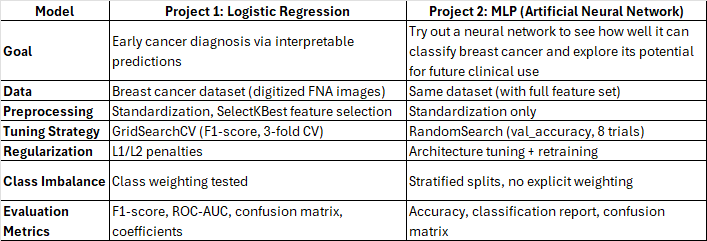

In healthcare context, logistic regression works well because it’s clear and easy to understand—important for making diagnoses and following rules. ANN models can be more accurate, but they need more testing and ways to explain their results before being used with patients. A good approach might be to use logistic regression for quick checks or supporting decisions, and use ANN models in the background or for research where accuracy is the top priority.

**5.1.3 Which model would you recommend for deployment, and why?**

The MLP outperform logistic regression in predictive accuracy, and this difference may become more noticeable with complex datasets that have nonlinear patterns, which logistic regression might miss. However, I recommend deploying the logistic regression model for breast cancer classification in a healthcare setting for several reasons.

Logistic regression provides interpretable coefficients, which make it easy to explain to clinicians how each feature affects the prediction. This explainability is crucial in clinical environments where both clinicians and regulatory bodies need to understand how decisions are made to build trust and ensure compliance. In contrast, the MLP model does not offer straightforward coefficients, making it harder for clinicians to understand its decision-making process, which could limit its acceptance in clinical practice.

The simplicity of logistic regression also means it trains faster, is easier to maintain, and is less likely to overfit, especially with smaller or cleaner datasets like the Breast Cancer Wisconsin dataset. Its straightforward nature supports better clinical decision-making and aligns more closely with regulatory requirements than the more complex MLP model.

Logistic regression requires less computing power and time for training and prediction, making it more practical in resource-limited clinical settings. Meanwhile, MLP models demand more computational resources and longer training times, which can be less feasible in these environments.

Regarding class imbalance, both models performed well. However, the logistic regression model explicitly addressed class imbalance by using class weighting and achieved strong results, particularly for the F1-score. The MLP model’s handling of imbalance is more sensitive to data preprocessing (such as standardization) and hyperparameter tuning, making it less reliable without careful optimization.

In summary, logistic regression is the preferred choice for initial deployment in healthcare due to its interpretability, simplicity, computational efficiency, and robustness. If maximizing accuracy is the primary goal and appropriate explainability tools are in place, the MLP could be considered for research or secondary analyses.


# 5.2 Communicating Uncertainty and Confidence
**Describe how you would communicate uncertainty or prediction confidence to stakeholders (e.g. clinicians, patients, IT staff).**

Communicating Uncertainty and Prediction Confidence

To share predictions from the breast cancer model effectively, I’d focus on transparency about uncertainty (like predicted probabilities) and tailor the message to each stakeholder’s background to build trust and promote informed use.

For Clinicians:
I would present the model's predictions along with probability scores, for example, “The model predicts a 92% chance of malignancy,” to give a clearer sense of confidence. Visual tools like a confusion matrix could also be used to help clinicians better understand the model's performance. It is important to stress that the model is meant to support clinical judgment, not replace it. I would also openly discuss the model's limitations, such as uncertainties arising from a limited dataset size or missing information like genetic data in the Breast Cancer Wisconsin dataset, so clinicians have realistic expectations about its use.

Patients:
I would use simple, everyday language to explain risk and uncertainty—for example, “This tool gives us helpful information, but we always confirm with other tests to get the full picture.” I would avoid technical terms like “probability” to keep things easy to understand. My focus would be on what the results mean for their care, making sure to avoid medical jargon, and providing reassurance about the next steps so they feel supported and informed.

IT Staff/Data Scientists:
I would share clear performance numbers like the F1 score and AUC-ROC to show how well the model works. I would explain how the logistic regression model calculates probabilities (using things like log-odds) and how it handles class imbalance by giving more weight to certain cases. I would also talk about how data preparation steps, like scaling features, affect the results, especially for the Breast Cancer Wisconsin dataset. I would address any data limitations, such as the small size of the dataset or missing information like genetic data, and mention any biases like imbalanced classes to help understand the model's strengths and weaknesses. I would provide access to the raw model outputs so the team can troubleshoot and make improvements. For future work, I would suggest trying new features or different models like MLPs for research, while keeping in mind any rules or regulations that need to be followed.





# 5.3 Design Improvements and Risk Mitigation Strategies

**Propose any design changes, deployment strategies, or safeguards that could help reduce risks, improve trust, and ensure safe and responsible use of the model in clinical practice.**

To ensure the logistic regression model is used safely in clinical settings, the followings can be considered.

Design Changes:
- Incorporate methods to show uncertainty in model predictions, such as prediction probability scores, ensemble methods, or thresholding. For example, many models like logistic regression provide a probability (e.g., a 95% chance of malignancy). Lower probabilities can indicate less certainty, helping clinicians know when to be more cautious. Using several models together (an ensemble) and comparing how much they agree can also reveal uncertainty (if the models disagree, the prediction is less certain). Also, you can choose a cutoff point—like only paying attention to cases with a chance above 95%—and treat results near that point as unclear, so doctors know when to be extra careful.
- Add state-of-the-art interpretability tools so that, for example, clinicians can see how specific factors (e.g., tumor size or clump thickness) contribute to a malignancy probability
- Continuously update the model with new, diverse clinical data to improve robustness and reduce bias.

Deployment Strategies:
- Integrate the model into existing clinical workflows as a decision-support tool, not a standalone diagnostic system, ensuring it complements rather than replaces clinical judgment.
- Provide training sessions for clinicians to familiarize clinicians with the model's outputs, limitations, and optimal use cases, emphasizing its role as an aid and how to interpret probability scores and uncertainty metrics.
- Pilot the model in controlled settings first, collecting feedback and monitoring real-world performance before broader rollout.

Safeguards:
- Implement strict data governance and privacy protections compliant with healthcare regulations.
- Set up ongoing monitoring to monitor model performance, using metrics like F1-score to ensure consistent reliability.
- Set clear protocols for allowing clinicians to override model predictions
- Transparent communication with patients and clinicians about the model's capabilities and uncertainties.

These steps will help mitigate risks, build trust, and promote responsible adoption in clinical practice.

#####################################################################################

Declaratation:

I, Seong-hee Kwon (zID: 5514968), affirm that this assessment is my own original work. I have not submitted this work for credit
elsewhere, before this course, or for any other purpose outside of this course.

I understand that the assessor may:


*   Share this work with another university faculty member for assessment purposes.
*   Submit this work to a plagiarism detection service, which might store a copy for future checks.
*   May use this assessment item for Scholarship of Teaching and Learning (SOTL) purposes, including educational research and
teaching demonstration.

#####################################################################################